In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint, quad
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

Resin weight is 380.83031167864823 g
We see from the graph on the left, the conversion levels off at about .67
We see from the graph on the right, it is only worth adding catalyst up to about 1500g


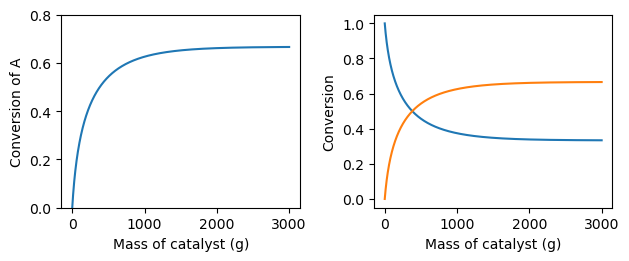

In [42]:
k = .00384
Keq= 4
KB = .46
KW = 3.2
CA0 = 1.5
CB0 = 1.5
CE0 = 0
CW0 = 0
FA0 = 1
FB0 = CB0*υ
FE0 = 0
FW0 = 0
υ = (FA0/CA0)

def dFdW (f,W):
    fa=f[0]
    fb=f[1]
    fe=f[2]
    fw=f[3]
    r=k*((fa*fb/υ**2)-(fe*fw/(Keq*υ**2)))/(1+KB*fb/υ+KW*fw/υ)
    return np.array([-r,-r,r,r])
f_0=np.array([FA0,FB0,FE0,FW0])
W=np.linspace(0,3000,1000)
c=odeint(dWdF,f_0,W) 
fa = c[:,0]
fb = c[:,1]
fe = c[:,2]
fw = c[:,3]
xa = (FA0 - fa)/FA0
#plt.plot(W,fa)
#plt.plot(W,fe)
plt.subplot(2,2,1)
plt.plot(W,xa)
plt.ylim(0,.8)
plt.ylabel("Conversion of A")
plt.xlabel("Mass of catalyst (g)")
f = interp1d(xa,W)
answer = f(.5)
print("Resin weight is",answer,"g")
print("We see from the graph on the left, the conversion levels off at about .67")
plt.subplot(2,2,2)
plt.plot(W,fa)
plt.plot(W,fe)
plt.xlabel("Mass of catalyst (g)")
plt.ylabel("Conversion")
plt.tight_layout()
print("We see from the graph on the right, it is only worth adding catalyst up to about 1500g")